In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load data from new_sample/butter_manual_raw.csv
df = pd.read_csv('../data/new_samples/butter_manual_raw_only_last.csv')
df.head()

,R,G,B,y
0,199,240,253,1
1,177,215,236,1
2,183,215,240,1
3,200,237,254,1
4,176,210,237,1


In [14]:
# Display mean colors by y
mean_colors = df.groupby('y').mean()

# Show them on the screen

,R,G,B
y,,,
0,199.900000,214.600000,209.6
1,186.166667,221.666667,243.5


In [3]:
# Center data
def normalize(df):
    print(f'Centering data with mean: \n{df.mean()}')
    df = df - df.mean()
    print(f'Normalizing data with std: \n{df.std()}')
    df = df / df.std()
    return df

df_x, df_y = df.iloc[:, 0:3], df.iloc[:, 3]
df_x_norm = normalize(df_x)

Centering data with mean: 
R    194.7500
G    217.2500
B    222.3125
dtype: float64
Normalizing data with std: 
R    10.069757
G     9.525405
B    19.434398
dtype: float64


In [4]:
# Train PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_x_pca = pca.fit_transform(df_x_norm)

# Write df_x_pca to csv
pd.DataFrame(df_x_pca, columns=['PCA1', 'PCA2']).to_csv('../data/new_samples/butter_manual_pca.csv', index=False)

In [5]:
# Plot PCA
import matplotlib.pyplot as plt
def pca_plot(df_x_pca, df_y, figsize=(5,5), colorbar=True, title=None, annotate=False):

    plt.figure(figsize=(7,5))
    plt.scatter(df_x_pca[:, 0], df_x_pca[:, 1], c=df_y, cmap='viridis')

    # Grid and lines
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    # Colorbar
    if colorbar:
        plt.colorbar()

    # Title
    if title:
        plt.title(f'PCA: {title}')

    # Write y for each point
    if annotate:
        for i, txt in enumerate(df_y):
            plt.annotate(txt, (df_x_pca[i, 0]+0.05, df_x_pca[i, 1]+0.05))

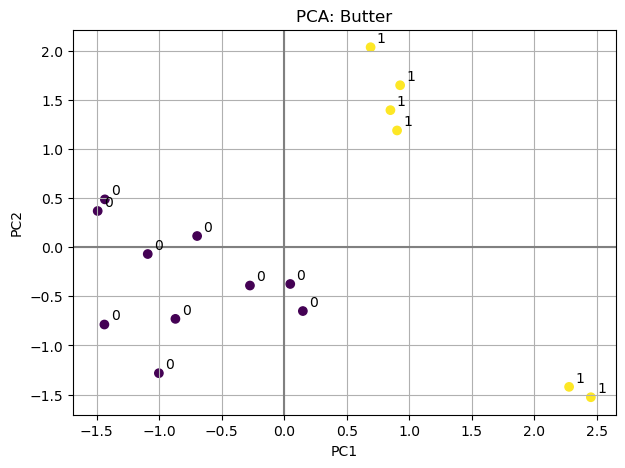

In [6]:
pca_plot(df_x_pca, df_y, colorbar=False, title='Butter', annotate=True)
plt.show()

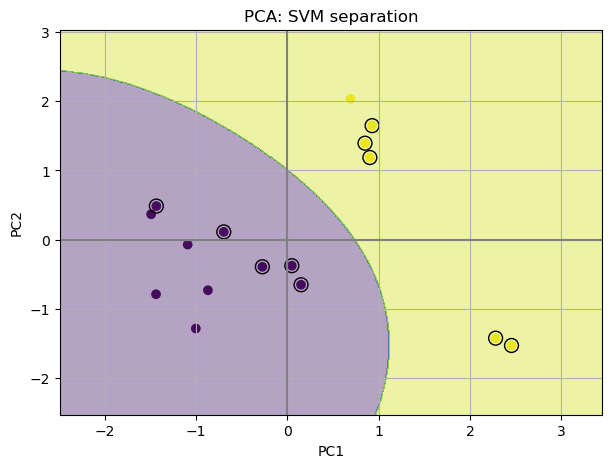

In [7]:
# Train SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(df_x_pca, df_y)

# Plot SVM
def svm_plot(df_x_pca, df_y, svm, figsize=(5,5), colorbar=False, title=None, annotate=False):

        # Create meshgrid
        x_min, x_max = df_x_pca[:, 0].min() - 1, df_x_pca[:, 0].max() + 1
        y_min, y_max = df_x_pca[:, 1].min() - 1, df_x_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))

        # Plot decision boundary
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot PCA
        pca_plot(df_x_pca, df_y, figsize=figsize, colorbar=colorbar, title=title, annotate=annotate)
        plt.contourf(xx, yy, Z, alpha=0.4)


svm_plot(df_x_pca, df_y, svm, title='SVM separation')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()

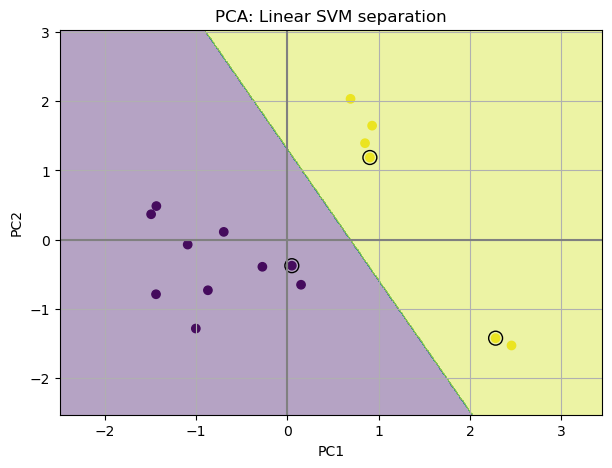

In [8]:
# Linear SVM
svm = SVC(kernel='linear', C=1)
svm.fit(df_x_pca, df_y)
svm_plot(df_x_pca, df_y, svm, title='Linear SVM separation')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Get hyperplane equation
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (svm.intercept_[0]) / w[1]

In [9]:
# Get coefs
b = svm.intercept_[0]
w0 = svm.coef_[0][0]
w1 = svm.coef_[0][1]

# Print equation
print(f'y = {w0:.2f}x1 + {w1:.2f}x2 + {b:.2f}')

y = 1.19x1 + 0.63x2 + -0.82


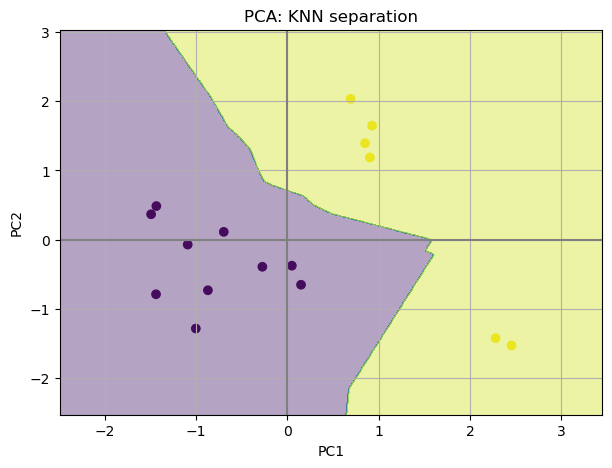

In [10]:
# Train KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df_x_pca, df_y)

# Plot KNN
def knn_plot(df_x_pca, df_y, knn, figsize=(5,5), colorbar=False, title=None, annotate=False):

        # Create meshgrid
        x_min, x_max = df_x_pca[:, 0].min() - 1, df_x_pca[:, 0].max() + 1
        y_min, y_max = df_x_pca[:, 1].min() - 1, df_x_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                np.arange(y_min, y_max, 0.01))

        # Plot decision boundary
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot PCA
        pca_plot(df_x_pca, df_y, figsize=figsize, colorbar=colorbar, title=title, annotate=annotate)
        plt.contourf(xx, yy, Z, alpha=0.4)

knn_plot(df_x_pca, df_y, knn, title='KNN separation')
plt.show()

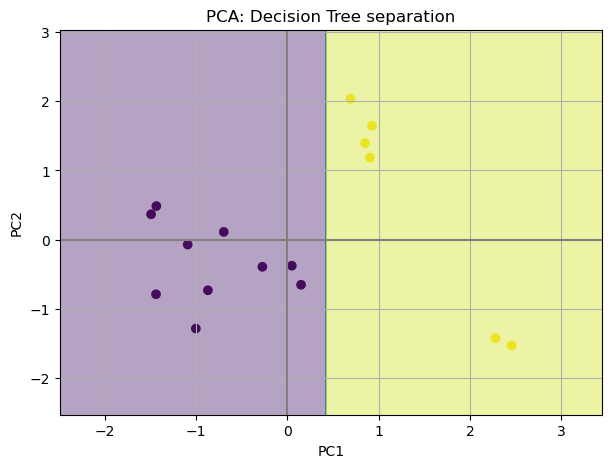

In [11]:
# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(df_x_pca, df_y)

# Plot Decision Tree
def dt_plot(df_x_pca, df_y, dt, figsize=(5,5), colorbar=False, title=None, annotate=False):
    
            # Create meshgrid
            x_min, x_max = df_x_pca[:, 0].min() - 1, df_x_pca[:, 0].max() + 1
            y_min, y_max = df_x_pca[:, 1].min() - 1, df_x_pca[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                    np.arange(y_min, y_max, 0.01))
    
            # Plot decision boundary
            Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            # Plot PCA
            pca_plot(df_x_pca, df_y, figsize=figsize, colorbar=colorbar, title=title, annotate=annotate)
            plt.contourf(xx, yy, Z, alpha=0.4)

dt_plot(df_x_pca, df_y, dt, title='Decision Tree separation')

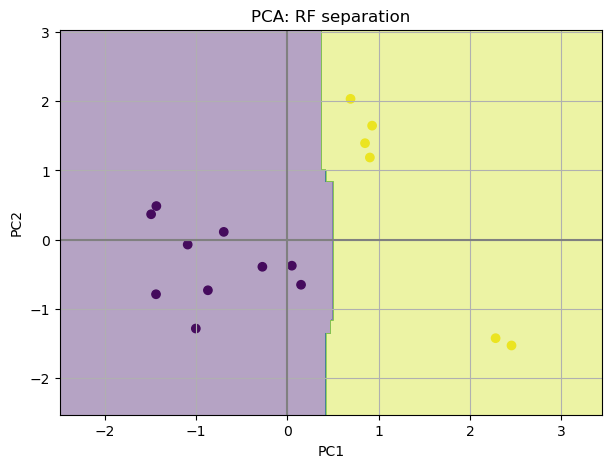

In [12]:
# Train RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(df_x_pca, df_y)

# Plot RF
def rf_plot(df_x_pca, df_y, rf, figsize=(5,5), colorbar=False, title=None, annotate=False):
    # Create meshgrid
    x_min, x_max = df_x_pca[:, 0].min() - 1, df_x_pca[:, 0].max() + 1
    y_min, y_max = df_x_pca[:, 1].min() - 1, df_x_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    # Plot decision boundary
    Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot PCA
    pca_plot(df_x_pca, df_y, figsize=figsize, colorbar=colorbar, title=title, annotate=annotate)
    plt.contourf(xx, yy, Z, alpha=0.4)

rf_plot(df_x_pca, df_y, rf, title='RF separation')